In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
datos = pd.read_csv('iris.csv')
datos.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
datos.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = datos[features]
y = datos['Species']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [67]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pred = knn.predict(X_test)


In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con k={k}: {accuracy*100:.2f}%")

Precisión del modelo con k=3: 100.00%


In [70]:
print("Reporte de clasificación\n", classification_report(y_test, y_pred))

Reporte de clasificación
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

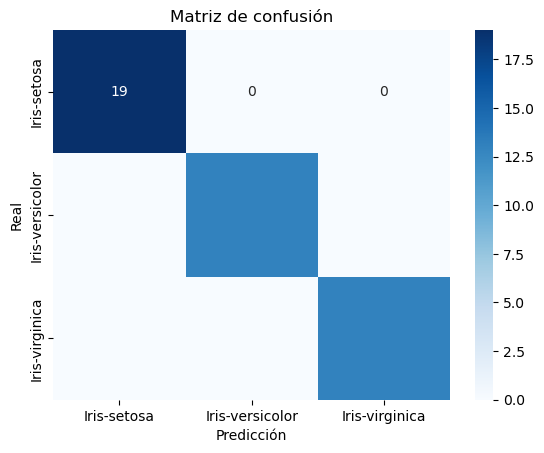

In [73]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=datos['Species'].unique(), yticklabels=datos['Species'].unique())
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

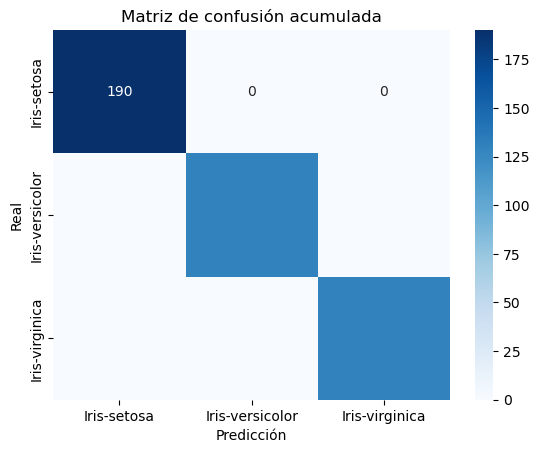

In [76]:
conf_matrices = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Sumar todas las matrices de confusión
total_conf_matrix = sum(conf_matrices)

# Mostrar la matriz de confusión acumulada
sns.heatmap(total_conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=datos['Species'].unique(), yticklabels=datos['Species'].unique())
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión acumulada')
plt.show()

In [78]:
# Crear un DataFrame a partir de la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Setosa', 'Actual Versicolor', 'Actual Virginica'], 
                              columns=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'])

# Mostrar la tabla
conf_matrix_df

,Predicted Setosa,Predicted Versicolor,Predicted Virginica
Actual Setosa,19,0,0
Actual Versicolor,0,13,0
Actual Virginica,0,0,13
